# Case3-2: ipywidgetsを使ってみる  
Use ipywidgets

In [1]:
%matplotlib inline
import seaborn as sns
import datetime
import pandas as pd
from pandas_datareader import data
from ipywidgets import interact
import matplotlib.pyplot as plt

## 株価(S&P指数)を取得  
get stock price (S&P 500)

In [2]:
try:
    gspc = data.DataReader("^GSPC", 'yahoo', datetime.datetime(2006, 1, 1), datetime.datetime(2015, 12, 31))
except Exception:
    gspc = pd.read_msgpack('data/^GSPC.mpack')

> * ipywidgets  
> https://ipywidgets.readthedocs.io/en/latest/
> * Computational tools  
> http://pandas.pydata.org/pandas-docs/stable/computation.html  
> pandasではmoving windowを扱うメソッドが用意されているので、移動平均や自作の関数を移動xxとして実装できる  
> pandas has method which handle moving windows, so can implement moving average and own function as  moving xx

## 株価に移動平均とボリンジャーバンドを加えて視覚化  
Create interactive visualization of moving average and Bollinger-Bands

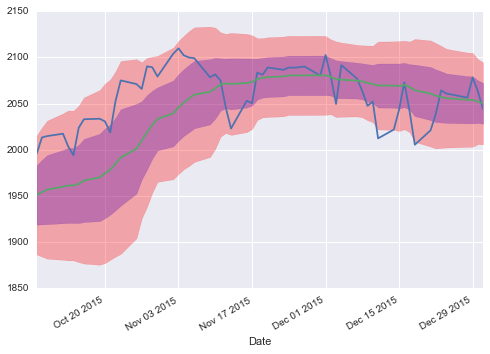

In [3]:
@interact(days=(30, len(gspc), 10), n=(2, 200, 1), rolling_mean=False, bollinger_bands=False)
def plot_rolling_mean(days=60, n=20, rolling_mean=False, bollinger_bands=False):
    gspc['Adj Close'].iloc[-days:].plot()
    if rolling_mean:
        gspc['Adj Close'].rolling(n).mean().iloc[-days:].plot()
    if bollinger_bands:
        sigma_1 = gspc['Adj Close'].rolling(n).apply(lambda x: x.mean() - x.std()).iloc[-days:]
        sigma_2 = gspc['Adj Close'].rolling(n).apply(lambda x: x.mean() - x.std() * 2).iloc[-days:]
        sigma1 = gspc['Adj Close'].rolling(n).apply(lambda x: x.mean() + x.std()).iloc[-days:]
        sigma2 = gspc['Adj Close'].rolling(n).apply(lambda x: x.mean() + x.std() * 2).iloc[-days:]
        plt.fill_between(sigma1.index, sigma_1, sigma1, alpha=0.3, color='b')
        plt.fill_between(sigma1.index, sigma_2, sigma2, alpha=0.3, color='r')